In [0]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7410 sha256=1f4031c41512846d25ccb5760c19461666a327ea601b4713103b988b4a318f43
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 12.8 GB  | Proc size: 156.0 MB
GPU RAM Free: 16280MB | Used: 0MB | Util   0% | Total 16280MB


In [4]:
costello = pd.read_csv('/content/drive/My Drive/costello_ace_2017-2018.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,10,11,12,20,23,24,25,29,30,31,32,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
costello.head()

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
0,4/1/2017,6:52:42,*5,G13674,9,11730 BETHPAGE,OTHER,56,FASTENERS,1,0.05,0.02,0.03,60.00%,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5,NaN,NaN,0,0.05,0,$0.05,Y,Cash Tender,-0.05,NaN,NaN,NaN,JOHN FILIPE,Sale,1,Sale,Manual Override,NaN
1,4/1/2017,7:02:55,290074,D70801,O,15863 COPIAGUE,OTHER,7158314,ACE FERT 4STEP 5M,1,64.99,43.5,21.49,33.07%,70,"LAWN, GARDEN & FARM SUPPLIES",744,FERTILIZERS,74401,LAWN (DRY BAG),5,1042017,S,1871,64.99,67.99,($3.00),Y,Bankcard Tender,3,11717,8017,1.92617e+09,LISA JUDGE,Sale,1,Sale,Promotion,NaN
2,4/1/2017,7:02:55,290074,D70801,O,15863 COPIAGUE,OTHER,IS117235,7158314 $20 INST SAVINGS,-1,-20,0,-20,100.00%,I1,ACE REWARDS INSTANT SAVINGS,IS1,ACE COUPON/CREDIT ITEMS,IS106,ACE COUPON/CREDIT ITEMS,5,170451AC,S,1871,20,20,$0.00,N,Bankcard Tender,0,11717,8017,1.92617e+09,LISA JUDGE,Return,2,Return,Promotion,NaN
3,4/1/2017,7:14:22,191376,A39683,F,14822 NORTHPORT,82901195757,78832,"ACE DECK NAIL16D3.5""ST1#",1,7.99,1.89,6.1,76.35%,56,FASTENERS,574,PACKAGE NAILS,57403,1 & 5LB NAILS AND STAPLES,1,NaN,NaN,0,7.99,7.99,$0.00,Y,Cash Tender,0,11768,760,1.91436e+09,GARY GASPAR LIPARI,Sale,1,Sale,Retail,NaN
4,4/1/2017,7:14:22,191376,A39683,F,14822 NORTHPORT,AUTO,9269862,CMN Donations,1,0.32,0.16,0.16,50.00%,DO,DONTATIONS,DON,DONATIONS,NaN,BLANK,4,NaN,*,0,0.32,0,$0.32,N,Cash Tender,-0.32,11768,760,1.91436e+09,GARY GASPAR LIPARI,Sale,2,Sale,Manual Override,NaN


In [0]:
costello.columns = [c.replace(' ', '_') for c in costello.columns]

In [0]:
costello.drop(costello[costello['Date'] == '\x1a'].index , inplace=True)

In [0]:
costello.drop(costello[costello['Date'] == 'Date'].index , inplace=True)

In [0]:
costello['Date'] = pd.to_datetime(costello['Date']) 

In [0]:
costelloData = costello[['Receipt_Number','Item_Description','Net_Sales_Units','Date','Net_Sales','Customer_Number','Department_Name']]

In [11]:
costelloData.shape

(17328020, 7)

In [0]:
costelloData = costelloData[costelloData.Customer_Number != '*5']

In [13]:
costelloData.shape

(12359959, 7)

In [0]:
costelloData = costelloData[(costelloData.Department_Name != 'DONTATIONS') & (costelloData.Department_Name != 'ACE REWARDS INSTANT SAVINGS') & (costelloData.Department_Name != 'IN STORE COUPONS') & (costelloData.Department_Name != 'HHC COUPONS AND CERTIFICATES') & (costelloData.Department_Name != 'COSTELLOS GIFT CARD') & (costelloData.Department_Name != 'GIFT CARD') & (costelloData.Department_Name != 'DEPOSITS') & (costelloData.Department_Name != 'LABOR') & (costelloData.Department_Name != 'GIFT CARD OFFSET (SPECL PROMO)') & (costelloData.Department_Name != 'OTHER INCOME') & (costelloData.Department_Name != 'NON-ACE INSTANT SAVINGS') & (costelloData.Department_Name != 'HHC MANUFACTURER COUPONS (TAXABL') & (costelloData.Department_Name != 'MARKETING') & (costelloData.Department_Name != 'DELIVERY & UPS')]

In [24]:
costelloData.shape

(10913367, 7)

In [29]:
costelloData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10913367 entries, 1 to 17328042
Data columns (total 7 columns):
Receipt_Number      object
Item_Description    object
Net_Sales_Units     float64
Date                datetime64[ns]
Net_Sales           float64
Customer_Number     object
Department_Name     object
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 666.1+ MB


In [0]:
for i in range(len(costelloData.Net_Sales)):
    if type(costelloData.Net_Sales.iloc[i]) != float:
        if ',' in costelloData.Net_Sales.iloc[i]:
            costelloData.Net_Sales.iloc[i] = costelloData.Net_Sales.iloc[i].replace(',','')

In [0]:
costelloData = costelloData[costelloData.Net_Sales_Units.astype(float) > 0]

In [26]:
costelloData.isnull().sum()

Receipt_Number      0
Item_Description    0
Net_Sales_Units     0
Date                0
Net_Sales           0
Customer_Number     0
Department_Name     0
dtype: int64

In [0]:
costelloData.dropna(subset=['Customer_Number'], inplace=True)

In [0]:
for i in range(len(costelloData.Net_Sales)):
    if type(costelloData.Net_Sales.iloc[i]) != float:
        if ',' in costelloData.Net_Sales.iloc[i]:
            costelloData.Net_Sales.iloc[i] = costelloData.Net_Sales.iloc[i].replace(',','')
    if type(costelloData.Net_Sales_Units.iloc[i]) != float:
        if ',' in costelloData.Net_Sales_Units.iloc[i]:
            costelloData.Net_Sales_Units.iloc[i] = costelloData.Net_Sales_Units.iloc[i].replace(',','')
        
costelloData['Net_Sales_Units'] = costelloData['Net_Sales_Units'].astype(float)
costelloData['Net_Sales'] = costelloData['Net_Sales'].astype(float)

In [36]:
print('Orders from {} to {}'.format(costelloData['Date'].min(), costelloData['Date'].max()))

Orders from 2017-01-01 00:00:00 to 2018-12-31 00:00:00


In [30]:
costelloData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10913367 entries, 1 to 17328042
Data columns (total 7 columns):
Receipt_Number      object
Item_Description    object
Net_Sales_Units     float64
Date                datetime64[ns]
Net_Sales           float64
Customer_Number     object
Department_Name     object
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 666.1+ MB


In [0]:
costelloData['Net_Sales'] = costelloData['Net_Sales'].astype(float)

In [29]:
for i in range(len(costelloData.Net_Sales_Units)):
    if type(costelloData.Net_Sales_Units.iloc[i]) != float:
        if ',' in costelloData.Net_Sales_Units.iloc[i]:
            costelloData.Net_Sales_Units.iloc[i] = costelloData.Net_Sales_Units.iloc[i].replace(',','')
            
costelloData['Net_Sales_Units'] = costelloData['Net_Sales_Units'].astype(float)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
costelloData['Price'] = costelloData['Net_Sales_Units'] * costelloData['Net_Sales']

In [35]:
orders = costelloData.groupby(['Receipt_Number','Date','Customer_Number']).agg({'Price': lambda x: x.sum()}).reset_index()
orders.head()

,Receipt_Number,Date,Customer_Number,Price
0,1,2018-05-02,99989,12.73
1,10,2018-05-05,99989,6.84
2,100,2017-06-06,1046,8.80
3,100,2018-06-03,26160,7.19
4,1000,2017-11-30,310329,99.98


In [37]:
orders.shape

(4708994, 4)

In [39]:
from datetime import timedelta

NOW = orders['Date'].max() + timedelta(days=1)
NOW

Timestamp('2019-01-01 00:00:00')

In [0]:
period = 365

In [0]:
orders['DaysSinceOrder'] = orders['Date'].apply(lambda x: (NOW - x).days)

In [43]:
aggr = {
    'DaysSinceOrder': lambda x: x.min(),  # the number of days since last order (Recency)
    'Date': lambda x: len([d for d in x if d >= NOW - timedelta(days=period)]), # the total number of orders in the last period (Frequency)
}
rfm = orders.groupby('Customer_Number').agg(aggr).reset_index()
rfm.rename(columns={'DaysSinceOrder': 'Recency', 'Date': 'Frequency'}, inplace=True)
rfm.head()

,Customer_Number,Recency,Frequency
0,*0,10,19
1,*1,18,22
2,*10,106,5
3,*100,245,4
4,*1000,162,6


In [44]:
rfm.shape

(349240, 3)

In [0]:
rfm['Monetary'] = rfm['Customer_Number'].apply(lambda x: orders[(orders['Customer_Number'] == x) & \
                                                           (orders['Date'] >= NOW - timedelta(days=period))]\
                                                           ['Price'].sum())
rfm.head()

In [0]:
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

In [0]:
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1
    
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5    

In [0]:
rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
rfm['M'] = rfm['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

In [0]:
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head() 

In [0]:
# for i in range(len(costello.Net_Sales)):
#     if type(costello.Net_Sales.iloc[i]) != float:
#         if ',' in costello.Net_Sales.iloc[i]:
#             costello.Net_Sales.iloc[i] = costello.Net_Sales.iloc[i].replace(',','')

In [0]:
costelloSub = costello[['Date','Customer_Number','Receipt_Number','Store_Name','Item_Description','Net_Sales_Units','Net_Sales']]

In [10]:
for i in range(len(costelloSub.Net_Sales)):
    if type(costelloSub.Net_Sales.iloc[i]) != float:
        if ',' in costelloSub.Net_Sales.iloc[i]:
            costelloSub.Net_Sales.iloc[i] = costelloSub.Net_Sales.iloc[i].replace(',','')

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
stock = pd.read_csv('/content/drive/My Drive/GSPC.csv')

In [0]:
stock = stock[['Date','Close']]

In [0]:
stock['Date'] = pd.to_datetime(stock['Date'])

In [22]:
stock.head()

,Date,Close
0,2017-01-03,2257.830078
1,2017-01-04,2270.750000
2,2017-01-05,2269.000000
3,2017-01-06,2276.979980
4,2017-01-09,2268.899902


In [0]:
costelloSubSub = costelloSub[:100]

In [0]:
costelloSubSub

,Date,Customer_Number,Receipt_Number,Store_Name,Item_Description,Net_Sales_Units,Net_Sales
0,2017-04-01,*5,G13674,11730 BETHPAGE,FASTENERS,1,0.05
1,2017-04-01,290074,D70801,15863 COPIAGUE,ACE FERT 4STEP 5M,1,64.99
2,2017-04-01,290074,D70801,15863 COPIAGUE,7158314 $20 INST SAVINGS,-1,-20
3,2017-04-01,191376,A39683,14822 NORTHPORT,"ACE DECK NAIL16D3.5""ST1#",1,7.99
4,2017-04-01,191376,A39683,14822 NORTHPORT,CMN Donations,1,0.32
5,2017-04-01,99996,2815,16147 CALDWELL,SCRAPR RAZOR5BLADES ACE,1,1.37
6,2017-04-01,99996,2815,16147 CALDWELL,LAUNDRY FAUCET 2H CH OB,1,12.25
7,2017-04-01,99996,2815,16147 CALDWELL,LAUNDRY TUB 33X23X25 1PK,1,29.81
8,2017-04-01,*5,E37837,15348 ROCKY POINT,"RULE TAPE 1""X25'POWRLOCK",1,12.99
9,2017-04-01,500851,D70802,15863 COPIAGUE,CLEANR GLAS19OZ SPRAYWAY,2,3.46


In [0]:
costelloSubSub.groupby('Date')['Net_Sales'].sum()

Date
2017-04-01    1228.41
Name: Net_Sales, dtype: float64

In [15]:
costelloSub['Net_Sales'] = costelloSub['Net_Sales'].astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
costelloSub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17328020 entries, 0 to 17328042
Data columns (total 7 columns):
Date                datetime64[ns]
Customer_Number     object
Receipt_Number      object
Store_Name          object
Item_Description    object
Net_Sales_Units     object
Net_Sales           float64
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 1.0+ GB


In [31]:
costelloData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10913367 entries, 1 to 17328042
Data columns (total 7 columns):
Receipt_Number      object
Item_Description    object
Net_Sales_Units     float64
Date                datetime64[ns]
Net_Sales           float64
Customer_Number     object
Department_Name     object
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 666.1+ MB


In [0]:
grpData = costelloData.groupby('Date')['Net_Sales'].sum()

In [0]:
grpData = grpData.to_frame()

In [0]:
grpData['Date'] = grpData.index

In [35]:
grpData

,Net_Sales,Date
Date,,
2017-01-01,104544.41,2017-01-01
2017-01-02,162953.78,2017-01-02
2017-01-03,97733.28,2017-01-03
2017-01-04,116036.47,2017-01-04
2017-01-05,142109.45,2017-01-05
...,...,...
2018-12-27,135943.20,2018-12-27
2018-12-28,108155.65,2018-12-28
2018-12-29,165227.47,2018-12-29


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


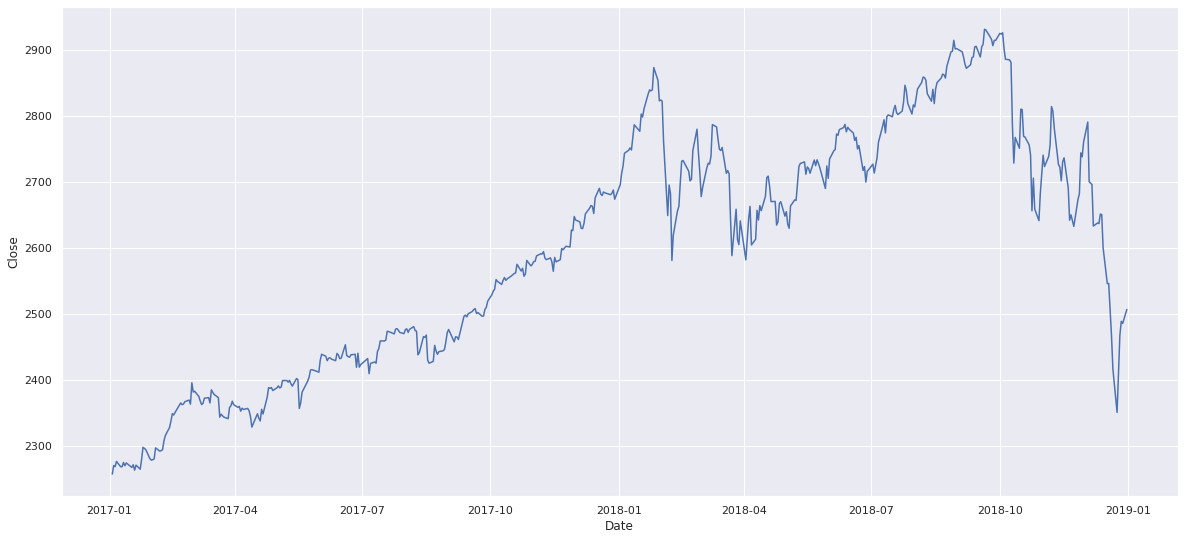

In [37]:
plt.figure(figsize=(20,9))
sns.lineplot(x="Date", y="Close", data = stock)

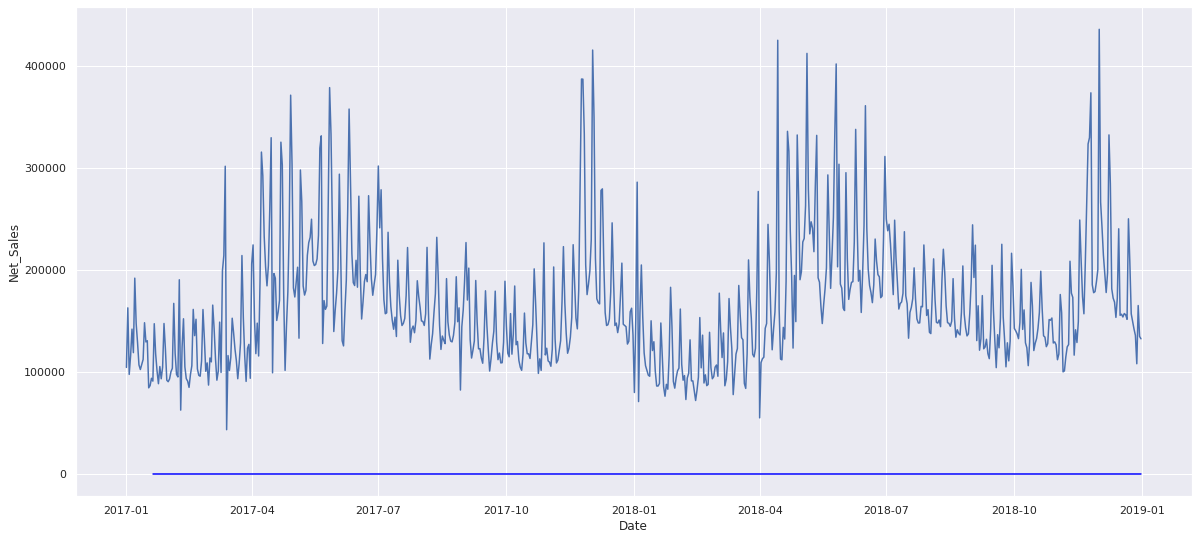

In [45]:
plt.figure(figsize=(20,9))
sns.lineplot(x="Date", y="Net_Sales", data = grpData)
rolling_mean = grpData.rolling(window = 20).mean()
plt.plot(np.log(rolling_mean), color="blue")
plt.show()

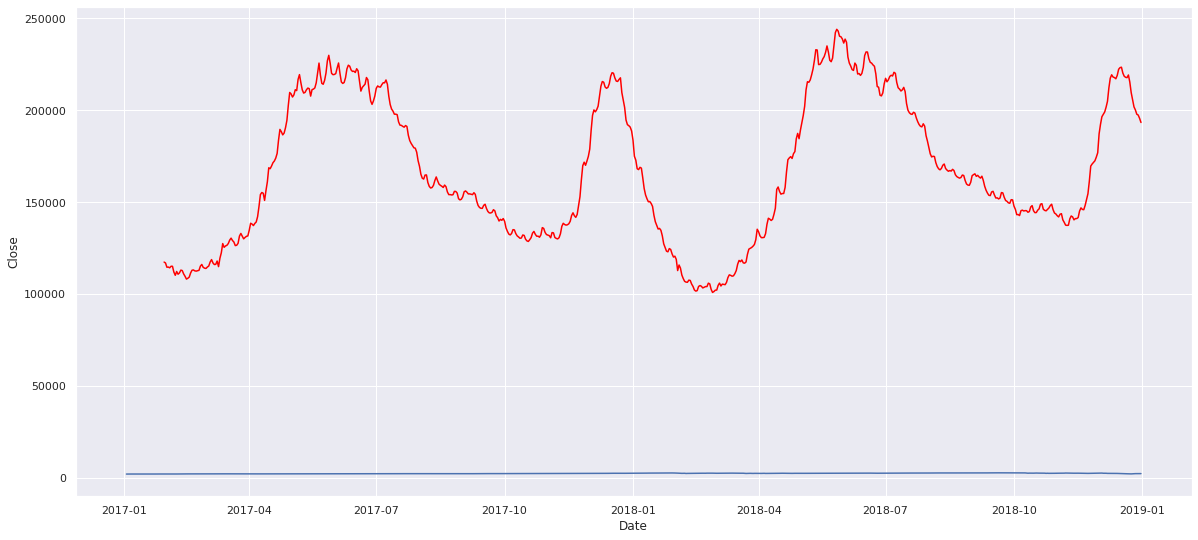

In [39]:
plt.figure(figsize=(20,9))
sns.lineplot(x="Date", y="Close", data = stock)
rolling_mean1 = grpData.rolling(window = 30).mean()
plt.plot(rolling_mean1, color="red")
plt.show()

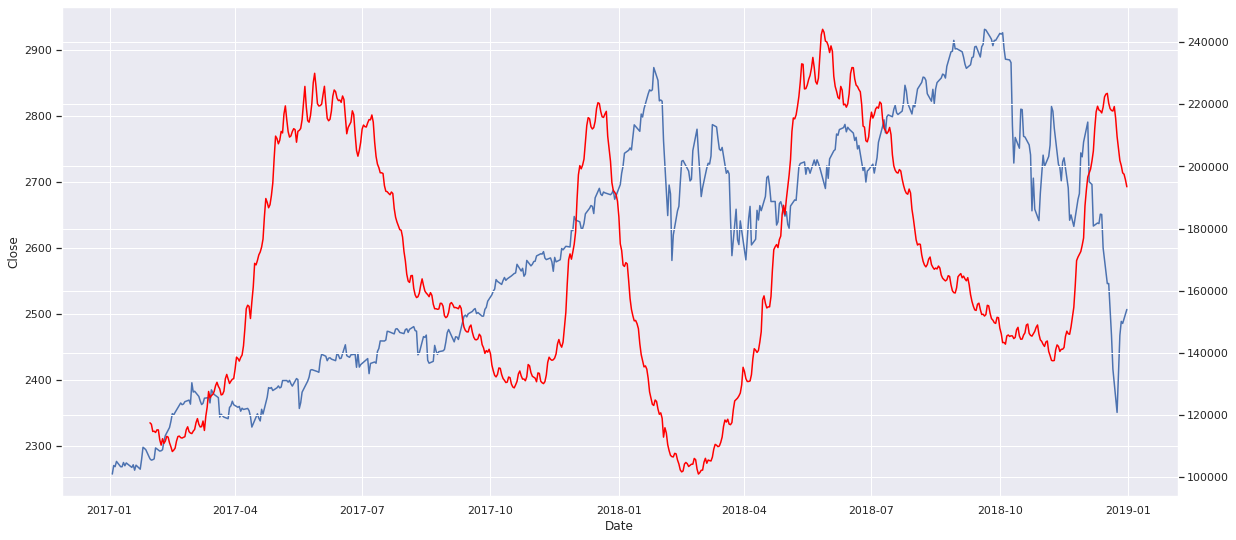

In [47]:
fig = plt.figure(figsize=(20,9))
ax1 = fig.add_subplot(111)
ax1 = sns.lineplot(x="Date", y="Close", data = stock)

ax2 = ax1.twinx()
ax2 = plt.plot(rolling_mean1, color="red")
# ax2.set_ylabel('y2', color='r')
# for tl in ax2.get_yticklabels():
#     tl.set_color('r')

In [0]:
stock['logclose'] = np.log(stock['Close'])

(502, 2)

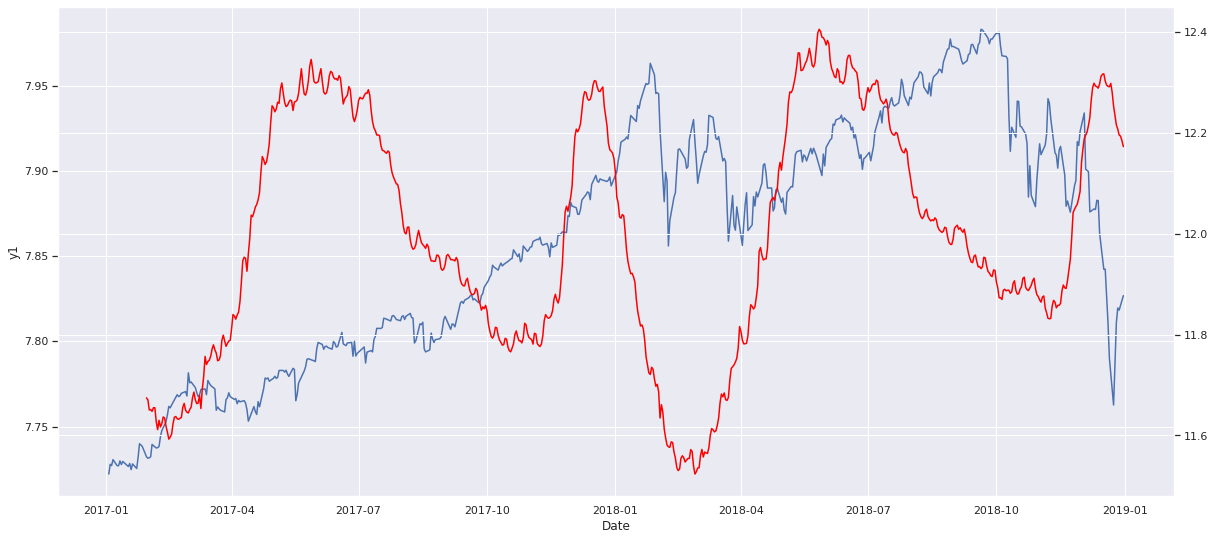

In [46]:
fig = plt.figure(figsize=(20,9))
ax1 = fig.add_subplot(111)
ax1 = sns.lineplot(x="Date", y="logclose", data = stock)
ax1.set_ylabel('y1')

ax2 = ax1.twinx()
ax2 = plt.plot(np.log(rolling_mean1), color="red")
# ax2.set_ylabel('y2', color='r')
# for tl in ax2.get_yticklabels():
#     tl.set_color('r')

In [0]:
dfCorr = grpData['Net_Sales']

In [0]:
dfCorr['Stock_Value'] = stock['Close']

In [0]:
dfCorr = dfCorr.to_frame()

,Net_Sales
Date,
2017-01-01 00:00:00,127956
2017-01-02 00:00:00,222278
2017-01-03 00:00:00,129000
2017-01-04 00:00:00,155324
2017-01-05 00:00:00,184539


In [0]:
stock.head()

,Date,Close
0,2017-01-03,2257.830078
1,2017-01-04,2270.750000
2,2017-01-05,2269.000000
3,2017-01-06,2276.979980
4,2017-01-09,2268.899902


In [0]:
grpData.reset_index(drop=True, inplace = True)
grpData.head()

,Net_Sales,Date
0,127955.94,2017-01-01
1,222278.16,2017-01-02
2,128999.98,2017-01-03
3,155323.94,2017-01-04
4,184538.72,2017-01-05


In [0]:
stockCopy = stock.copy()

In [0]:
stockCopy['NetSales'] = grpData['Net_Sales']

In [0]:
stockCopy.head()

,Date,Close,NetSales
0,2017-01-03,2257.830078,127955.94
1,2017-01-04,2270.750000,222278.16
2,2017-01-05,2269.000000,128999.98
3,2017-01-06,2276.979980,155323.94
4,2017-01-09,2268.899902,184538.72


In [0]:
stock.iloc[251:]

,Date,Close
251,2018-01-02,2695.810059
252,2018-01-03,2713.060059
253,2018-01-04,2723.989990
254,2018-01-05,2743.149902
255,2018-01-08,2747.709961
...,...,...
497,2018-12-24,2351.100098
498,2018-12-26,2467.699951
499,2018-12-27,2488.830078
500,2018-12-28,2485.739990


In [0]:
stockCopy.drop(columns=['Date'], inplace = True)

In [0]:
pearsonCorr = stockCopy[251:].corr(method="pearson")

In [0]:
pearsonCorr

,Close,NetSales
Close,1.000000,-0.402206
NetSales,-0.402206,1.000000


In [0]:
costelloSub.columns

Index(['Date', 'Customer_Number', 'Receipt_Number', 'Store_Name',
       'Item_Description', 'Net_Sales_Units', 'Net_Sales'],
      dtype='object')

In [0]:
costelloSub['DepartmentName'] = costello['Department_Name']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


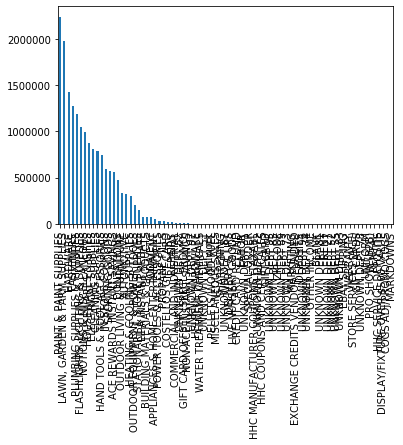

In [0]:
costelloSub['DepartmentName'].value_counts().plot(kind='bar')

In [0]:
costello.columns

Index(['Date', 'Transaction_Time', 'Customer_Number', 'Receipt_Number',
       'Store_#', 'Store_Name', 'Scanned_UPC', 'Item_Number',
       'Item_Description', 'Net_Sales_Units', 'Net_Sales', 'Cost',
       'Gross_Margin', 'Gross_Margin_%', 'Department_Code', 'Department_Name',
       'Class_Code', 'Class_Name', 'Fineline_Code', 'Fineline_Name',
       'Item_was_Scanned', 'MIP_Promo_ID', 'Promo/Discount',
       'Dynamic_Promo_ID', 'Actual_Price', 'Retail_Price', 'Actual-Retail',
       'Taxable', 'Tender_Type', '$_Off_Retail', 'Zip_Code', 'Zip_Plus-4',
       'Loyalty_ID', 'Clerk', 'Item_Type', 'Line_#',
       'Line_Item_Transaction_Type', 'Pricing_Source', 'Return_Code'],
      dtype='object')

In [0]:
custZipCodes = pd.DataFrame()

In [0]:
custZipCodes['ZipCode'] = costello['Zip_Code']

In [0]:
zipcodes = custZipCodes['ZipCode'].dropna()

In [0]:
costello['Store_Name'].unique()

array(['11730 BETHPAGE', '15863 COPIAGUE', '14822 NORTHPORT',
       '16147 CALDWELL', '15348 ROCKY POINT', '6910 FARMINGDALE',
       '11116 BELLMORE', '16354 LINCOLN PARK', '15110 GARDEN CITY PARK',
       '3164 NESCONSET', '14070 NEW HYDE PARK', '16660 GLEN BURNIE',
       '14252 ISLAND PARK', '5144 DEER PARK AVE', '16663 EDGEWATER',
       '14664 NORTH MASSAPEQUA', '16324 BROOKLYN', '15280 EAST ISLIP',
       '15998 BALDWIN HARBOR', '15238 SMITHTOWN', '16661 PASADENA',
       '15784 EI PAINT', '16038 NORTH BELLMORE', '12168 WEST ISLIP',
       '11428 MASSAPEQUA PARK', '14874 WEST BABYLON', '15444 GREAT NECK',
       '7504 GRAND BLVD', '16476 MELVILLE', '13168 BOHEMIA WAREHOUSE',
       '16791 STATEN ISLAND'], dtype=object)

In [0]:
costelloStores = pd.DataFrame()
costelloStores['StoreName'] = costello['Store_Name'].unique()

In [0]:
costelloStores.to_csv('storezipCode.csv',index=False,header=False)
files.download('storezipCode.csv')

In [40]:
zipcodes

1           11717
2           11717
3           11768
4           11768
9           11762
            ...  
17328031    11779
17328032    11501
17328033    11501
17328034    11762
17328035    11762
Name: ZipCode, Length: 12121767, dtype: object

In [0]:
zipcodesDf = pd.DataFrame(data=zipcodes)

In [0]:
zipcodesDf.drop(zipcodesDf[zipcodesDf['ZipCode'] == 'NY'].index , inplace=True)

In [0]:
zipcodesDf.drop(zipcodesDf[zipcodesDf['ZipCode'] == '-'].index , inplace=True)
zipcodesDf.drop(zipcodesDf[zipcodesDf['ZipCode'] == '-----'].index , inplace=True)

In [0]:
zipcodesDf['ZipCode'] = zipcodesDf['ZipCode'].astype(int)

In [0]:
zipcodesDf['ZipCode'] = zipcodesDf[zipcodesDf['ZipCode'] > 10000]

In [78]:
zipcodesDf.shape

(12119979, 1)

In [83]:
from google.colab import files

zipcodesDf.to_csv('custZipCodes.csv',index=False,header=False)
files.download('custZipCodes.csv')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 36320, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

In [0]:
zipcodesDf.dropna(inplace=True)

In [82]:
zipcodesDf.isnull().sum()

ZipCode    0
dtype: int64